In [3]:
import django
import sys, os

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from django.db.models import Sum, Count

In [4]:
q = Query.objects.get(pk=6018)
docs = Doc.objects.filter(query=q,content__iregex='\w')

pydocs = docs.values('PY').annotate(
    n = Count('pk')
).order_by('PY')

pydf = pd.DataFrame.from_dict(list(pydocs))



AttributeError: 'DataFrame' object has no attribute 'bar'

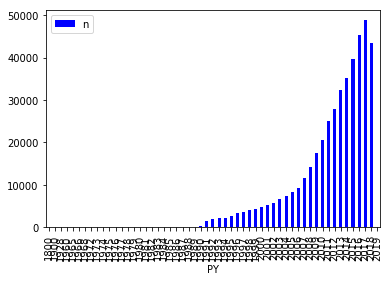

In [10]:
pydf.plot.bar(x='PY',y='n',color="blue")

In [11]:
ptdocs = docs.values('wosarticle__pt').annotate(
    n = Count('pk')
).order_by('n')

ptdf = pd.DataFrame.from_dict(list(ptdocs))

ptdf.head(50)

,n,wosarticle__pt
0,152,P
1,16112,B
2,27268,S
3,393334,J
